## Clustering

In [ ]:
def hdbscanner(df):
    hdbscan_obj = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40, metric='euclidean', min_cluster_size=5, min_samples=None, p=None).fit(df)
    labels = hdbscan_obj.labels_
    df['category'] = pd.Series(labels)
    return df


# takes 3m52.2s
df1_ = SOURCEDF.copy()
df1_ = df1_.loc[:, ['orig_bytes','resp_bytes','orig_p', 'resp_p']]
df1 = hdbscanner(SOURCEDF)

In [ ]:
df1.head(10)


,index,orig_h,orig_p,resp_h,resp_p,orig_bytes,resp_bytes,label,proto_icmp,proto_tcp,proto_udp,category
0,1,3232261223,60905,2209273747,23,0.0,0.0,1,0,1,0,4015
1,4,3232261223,34243,2466726347,49560,0.0,0.0,0,0,1,0,-1
2,9,3232261223,52259,3250416306,23,0.0,0.0,1,0,1,0,5716
3,10,3232261223,42207,178903906,8080,0.0,0.0,1,0,1,0,6
4,12,3232261223,40459,3564025020,23,0.0,0.0,1,0,1,0,-1
5,17,3232261223,39813,2813926936,23,0.0,0.0,1,0,1,0,-1
6,20,3232261223,52482,2957091802,23,0.0,0.0,1,0,1,0,-1
7,21,3232261223,49307,2990506127,23,0.0,0.0,1,0,1,0,4790
8,24,3232261223,52702,3239810762,2323,0.0,0.0,1,0,1,0,-1
9,26,3232261223,40485,3113962306,8080,0.0,0.0,1,0,1,0,5609


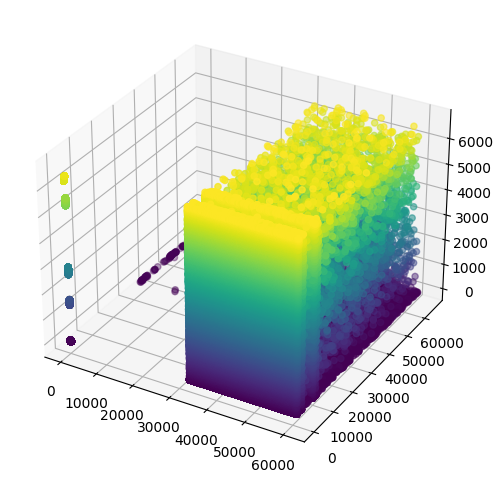

In [ ]:
fig = plt.figure(figsize=(6,6))

ax = plt.axes(projection='3d')
#sc = ax.scatter(data=df1, x='orig_p', y='resp_p', z='category', s=40, c='category', marker='o', cmap='plasma', alpha=1)

ax.scatter3D(df1['orig_p'], df1['resp_p'], df1['category'], c=df1['category'])

plt.show()

## Model Training using linear Kernel
from [here](https://datagy.io/python-support-vector-machines/)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:

X = df1[['orig_p', 'resp_p']]
y = df1['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)


In [ ]:
def train_linear():
    # Building and training our model
    clf = SVC(kernel='linear', verbose=False)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(f"Acccuracy: {accuracy_score(y_test, predictions)}")
    # interrupted after 526 minutes
    return clf

In [ ]:
def visualise_linear(clf):
# Visualizing the linear function for our SVM classifier
    w = clf.coef_[0]
    b = clf.intercept_[0]
    x_visual = np.linspace(0,60000)
    y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

    scatterplot(data = X_train, x='orig_p', y='resp_p', hue=y_train)
    plt.plot(x_visual, y_visual)
    plt.show()

## Model Training using better Kernel
**THIS DID NOT WORK AS EXPECTED AND SINCE SVM IS NOT NECESSARY ANYWAYS, IT WONT BE FIXED**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [ ]:
def encoder(df: pd.DataFrame):
    X = df.drop(['label'], axis=1)
    y = df['label'].to_frame()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
    column_transformer = make_column_transformer(
    (OneHotEncoder(), ['orig_h', 'resp_h', 'proto']),
    remainder='passthrough')
    X_train = column_transformer.fit_transform(X_train)
    X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())
    print(X_train.head())

# encoder(SOURCEDF)